# ***Multi class classification Problem and solve by ANN***

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'
    
print(device)

cuda


In [7]:
## Set random deed for reproducibility
torch.manual_seed(42)

In [8]:
df = pd.read_csv('data/fashion-mnist_train.csv')
df.sample(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
43266,8,0,0,0,0,96,156,157,173,143,...,0,0,0,0,0,0,0,0,1,0
49472,2,0,0,0,0,0,0,0,2,0,...,0,0,0,115,182,70,0,0,0,0
22873,3,0,0,0,0,0,0,0,0,0,...,132,114,48,0,0,0,0,0,0,0
38453,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22609,2,0,0,0,0,0,0,0,0,0,...,104,50,3,115,110,20,0,0,0,0


In [9]:
df.shape

(60000, 785)

## *See the images data*

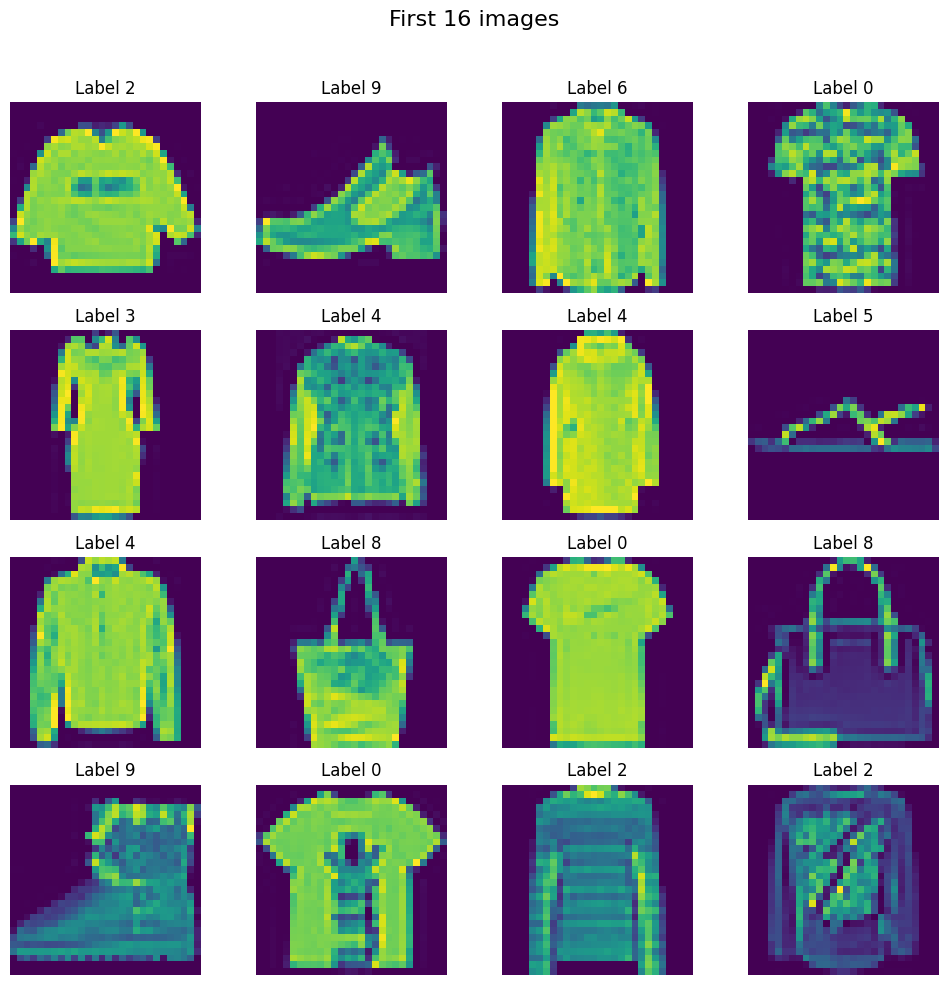

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

## plt the images
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label {df.iloc[i, 0]}")
    
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
X_train = X_train/ 255.0
X_test = X_test / 255.0

## *Now Create Custom Dataset class*

In [14]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

#### create train_dataset object

In [15]:
train_dataset = CustomDataset(X_train, y_train)

In [16]:
int(len(train_dataset))

48000

In [17]:
test_dataset = CustomDataset(X_test, y_test)

## create train and test loader

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)  ## if do shuffle in prediction time then accuracy will not came exactly.

## *Define Neural Network Class*

In [19]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=num_features, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            # nn.Softmax() ## Here no need to add explecitly add softmax method in pytorch cross entropy loss there already has softmax implemented
        )
        
    def forward(self, x):
        return self.model(x)

## Set learning rate and Number of Epochs

In [20]:
epochs=100
learning_rate = 0.01

In [21]:
## insatiate the Model
model = MyNN(X_train.shape[1])
model = model.to(device=device)

## loss function
criterion = nn.CrossEntropyLoss()

## optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## *Training Loop*

In [22]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:
    ## move data to GPU
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.5655486205716928
Epoch: 2 , Loss: 0.4524860588560502
Epoch: 3 , Loss: 0.42773867324739695
Epoch: 4 , Loss: 0.41506070354829233
Epoch: 5 , Loss: 0.4130784388333559
Epoch: 6 , Loss: 0.385960451297462
Epoch: 7 , Loss: 0.3969546410292387
Epoch: 8 , Loss: 0.3829782746980588
Epoch: 9 , Loss: 0.37606004800150794
Epoch: 10 , Loss: 0.3883366521994273
Epoch: 11 , Loss: 0.3669286671429873
Epoch: 12 , Loss: 0.3711383791193366
Epoch: 13 , Loss: 0.37445582839349906
Epoch: 14 , Loss: 0.36172362202902636
Epoch: 15 , Loss: 0.35646876026441654
Epoch: 16 , Loss: 0.3598074141715964
Epoch: 17 , Loss: 0.3593548300738136
Epoch: 18 , Loss: 0.35519748022655645
Epoch: 19 , Loss: 0.34822523450354737
Epoch: 20 , Loss: 0.3482415198435386
Epoch: 21 , Loss: 0.35218704415857793
Epoch: 22 , Loss: 0.34693924287954964
Epoch: 23 , Loss: 0.34710021153340737
Epoch: 24 , Loss: 0.3495143038183451
Epoch: 25 , Loss: 0.3409066839839021
Epoch: 26 , Loss: 0.34303846540053684
Epoch: 27 , Loss: 0.3429985759059588

# ***Evaluation the model***

In [57]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [23]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.86175
